<center>
    
## <font color='maroon'>ASTR 21100/31200</font>
## <font color='maroon'>Computational techniques in astrophysics<br></font>

## <font color='maroon'>Numerical computation of derivatives<br></font>
</center>



### Instructor: 
Andrey Kravtsov (email: <tt>kravtsov@uchicago.edu</tt>)
Professor,<br> Department of Astronomy & Astrophysics

## <font color='darkblue'>Computing derivatives numerically

``*Finite differences have, in themselves, but little importance to the student of matter and ether. They are here regarded simply as a makeshift for infinitesimals; and the understanding is always that we will eventually make the differences so small that the errors due to their finite size will be less than the errors of experiment of practical working, and may therefore be disregarded. That it is possible to make them small enough without much labour is illustrated by examples given hereafter.*''
    
                -- Lewis Fry Richardson, 1910
    
    
For some functions we can derive mathematical expression for a function derivative. For many others, such derivatives are either difficult or impossible to compute using direct mathematical derivation. In such cases it is still possible to compute approximate derivatives numerically. 
    
Also, in practice we often deal with tabulated data. Derivatives of functions represented by such data evaluated only at certain discrete values of their argument also need to be evaluated numerically (i.e., using calculations of the kind discussed below). 

### <font color='darkblue'>An example: duration of day in Chicago throughout the year and rate of its change
    
This example is based on Sections 2.1.1 and 2.1.2 in the <a href="https://link.springer.com/content/pdf/10.1007%2F978-3-030-70347-9.pdf">"Numerical Python in Astronomy and Astrophysics" book</a> by Wolfram Schmidt and Marcel Völschow (see #class_materials channel on Slack). 


Compute declination of the Sun in the <a href="https://en.wikipedia.org/wiki/Right_ascension">Right Ascension (RA) - Declination (Dec) astronomical coordinate system</a> used to describe coordinates of objects on the sky for a given day $N$ since January 1 (January 1st is $N=0$). 

Using NumPy we can compute it for all 365 days using numpy operations. 

In [7]:
import numpy as np

omega = 2*math.pi/365.24 # angular velocity in rad/day; 365.24 is the average number of days in a year
ecl = math.radians(23.44) # obliquity of the ecliptic

N = np.arange(365) # generate a numpy array of length 365 with values from 0 to 365
delta_sun = -np.arcsin(np.sin(ecl)*np.cos(omega*(N+10)))

In [20]:
# Chicago latitude: 41° 51' 0.11"
# -> to radians = (degrees + arcminutes/60 + arcseconds/(60*60)) * pi/180 
# factor pi/180 converts from degrees to radians because pi radians = 180 degrees 

phi = (41.0 + 51/60 + 11/3600) * np.pi/180
print(f'Chicago latitude in radians = {phi:.5f}')

Chicago latitude in radians = 0.73047


The same using <a href="">AstroPy</a> functions 

In [19]:
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u

# geographical position of the observer
obs = EarthLocation(lat=41*u.deg+51*u.arcmin+11*u.arcsec, lon=87*u.deg+39*u.arcmin+0.18*u.arcsec)

# get latitude
phia = obs.lat
print(phia, f' in radians = {phia.radian:.5f}')

41d51m11s  in radians = 0.73047


In [84]:
# calculate the length of time the Sun is up in hours
# numpy functions such as np.tan and np.arccos can operate on all elements in the array
# functions like math.tan can operate only on a single number at a time
hday = np.arccos(-np.tan(delta_sun) * math.tan(phi))
day_duration = (np.degrees(2*hday)/360) * 23.934469592

In [48]:
from matplotlib import pylab as plt
%matplotlib inline 
from codes.plotting import plot_prettier
plot_prettier()


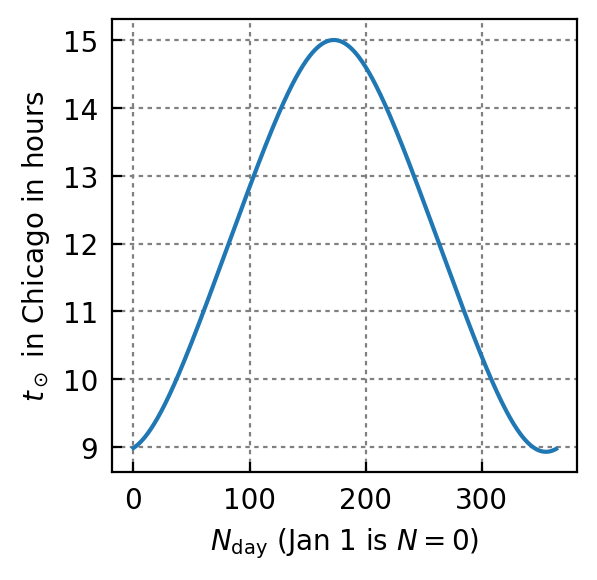

In [85]:
# plot the number of hours the Sun is up in Chicago throughout the year
plt.figure(figsize=(3,3))
plt.xlabel(r'$N_{\rm day}$ (Jan 1 is $N=0$)')
plt.ylabel(r'$t_\odot$ in Chicago in hours')
plt.plot(N, day_duration)
plt.grid(ls='dotted', color='gray')
plt.show()

In [54]:
def der1_1(func, x, h):
    '''
    1st order estimate of the first derivative for input function func
    evaluated with the step h
    '''
    return (func(x+h) - func(x))/h

def der1_2(func, x, h):
    '''
    2nd order estimate of the first derivative for input function func
    evaluated with the step h
    '''
    return (func(x+h) - func(x-h))/(2*h) 

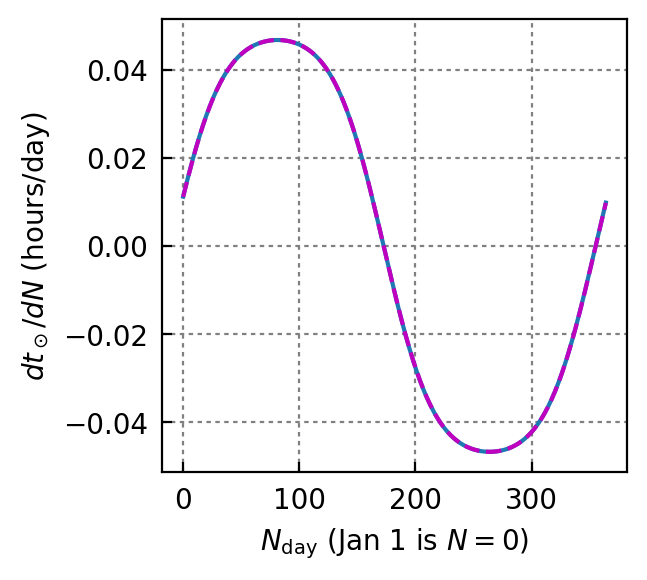

In [89]:
from scipy.interpolate import UnivariateSpline
tdaysp = UnivariateSpline(N, day_duration, s=0.) # constuct smooth spline approximation through the points 

plt.figure(figsize=(3,3))
plt.xlabel(r'$N_{\rm day}$ (Jan 1 is $N=0$)')
plt.ylabel(r'$dt_\odot/dN$ (hours/day)')
step = 0.1
plt.plot(N, der1_1(tdaysp, N, step))
plt.plot(N, der1_2(tdaysp, N, step), ls='--', c='m')
plt.grid(ls='dotted', color='gray')
plt.show()

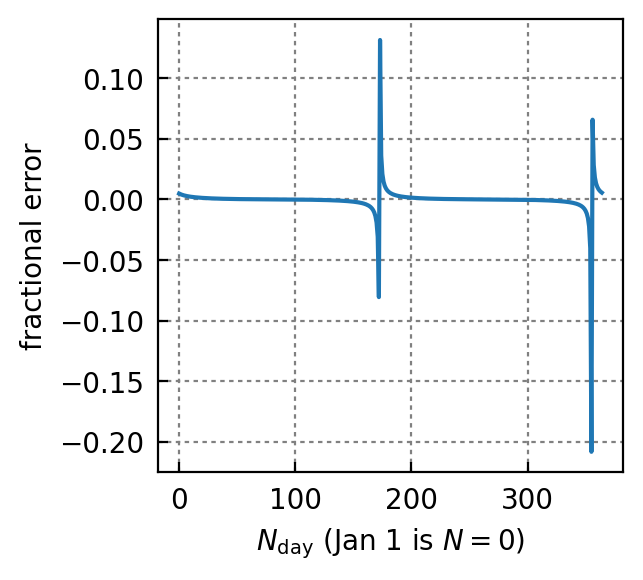

In [91]:
plt.figure(figsize=(3,3))
plt.xlabel(r'$N_{\rm day}$ (Jan 1 is $N=0$)')
plt.ylabel(r'fractional error')
# fractional error
step = 0.1
fracerr = (der1_1(tdaysp, N, step) - der1_2(tdaysp, N, step)) / der1_2(tdaysp, N, step)
plt.plot(N, fracerr)
plt.grid(ls='dotted', color='gray')
plt.show()

### <font color='darkblue'>Order of the scheme and fractional (relative) error
    
    
    fractional error = (estimate - exact) / exact

In [82]:
def der1_4(func, x, dx): 
    return (4*der1_2(func, x, dx/2) - der1_2(func, x, dx))/3 

def der1_6(func, x, dx): 
    return (16*der1_4(func, x, dx/2) - der1_4(func, x, dx))/15 

def der1_8(func, x, dx): 
    return (4**3*der1_6(func, x, dx/2) - der1_6(func, x, dx))/63 

x, dx = np.pi, 0.01
ferr2 = der1_2(np.sin, x, dx) / np.cos(x) - 1.0
f
print(der1_2(np.sin, x, dx), ferr2, ferr4, ferr6, ferr8)

-0.9999833334166451 -1.666658335486293e-05 -2.085442929455894e-11 -2.1316282072803006e-14 2.355893258254582e-13


In [98]:
x, dx = np.pi, 0.1
ferr2 = der1_2(np.sin, x, dx) / np.cos(x) - 1.0

print(der1_2(np.sin, x, dx), ferr2)

-0.9983341664682823 -0.0016658335317176753


### <font color='darkblue'>The basis for numerical estimates of derivatives is Taylor series expansion 

$$f(x) = f(x_0)+f^\prime(x_0)\,(x-x_0)+\frac{1}{2}f^{\prime\prime}(x_0)\,(x-x_0)^2 + \mathcal{O}[(x-x_0)^3],$$

where $f^\prime(x_0)$ is derivative of $f(x)$ with respect to $x$ evaluated at point $x_0$, while $f^{\prime\prime}(x_0)$ is 2nd derivative, etc. 
    
The term $\mathcal{O}[(x-x_0)^3]$ is the standard shorthand for ``and terms of order 3 and higher''. If we neglect terms above certain order, we are no longer guaranteed to represent $f(x)$ exactly.

### <font color='darkblue'>Numerical evaluation of $f^\prime(x)$ 

2nd order estimate of the first derivative (see assigned reading): 
    
$$\frac{f(x_0+h) - f(x_0-h)}{2h} = f^\prime(x_0) + e_2\,h^2 + \mathcal{O}(h^4).$$
 


### <font color='darkblue'>Richardson's approach to the limit 

The trick used above to successively eliminate leading term in the truncation error to construct successively higher order schemes was devised by physicist Lewis Fry Richardson, who studied turbulence in the atmosphere and doing numerical simulations of such turbulent flows before electronic computers existed. 
    
Richardson wanted to devise a method which would allow to get accurate result in calculations involving derivatives while making as few calculations by hand as possible, because these would need to be done by humans. 
    
<img size=500 src="http://astro.uchicago.edu/~andrey/classes/a330f17/fig/Lewis_Fry_Richardson_wiki_photo.png"></img>

<center>Lewis Fry Richardson</center>
